# WITH PANDAS AND MATPLOTLIB

In [2]:
# Basic Libraries
import numpy as np 
import pandas as pd

# Visualizations Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [4]:
kill = pd.read_csv('/Users/saint/Downloads/PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
kill.describe(include="all")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,2535.000000,2535,2535,2535,2526,2458.000000,2535,2340,2535,2535,2535,2535,2470,2535
unique,NaN,2481,879,2,68,NaN,2,6,1417,51,2,3,4,2
top,NaN,TK TK,24/01/17,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,49,8,2363,1398,NaN,2428,1201,39,424,1902,1611,1695,2264
mean,1445.731755,NaN,NaN,NaN,NaN,36.605370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,794.259490,NaN,NaN,NaN,NaN,13.030774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,768.500000,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1453.000000,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2126.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

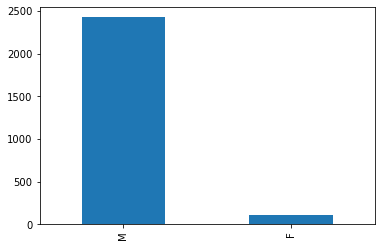

In [19]:
kill.gender.value_counts().plot.bar();

In [21]:
a = list(kill.gender.value_counts().values)
a

[2428, 107]

In [22]:
b = list(kill.gender.value_counts().index)
b

['M', 'F']

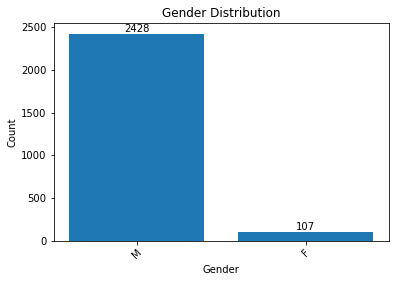

In [38]:
fig, ax=plt.subplots()
container = ax.bar(b,a)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Gender Distribution")
ax.set_xticklabels(b, rotation=45)
ax.bar_label(container)
plt.show()

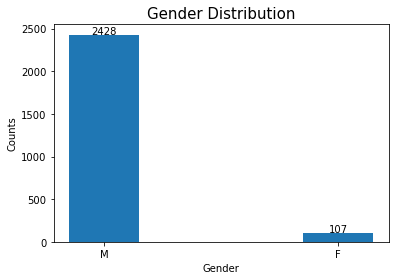

In [29]:
# with pandas
fig, ax = plt.subplots()
container = ax.bar(b, a, width=0.3)
ax.set_xlabel("Gender")
ax.set_ylabel("Counts")
ax.set_title("Gender Distribution", fontsize=15)

ax.set_xticklabels(b, rotation=90)
ax.bar_label(container, padding=-1)
fig.show()

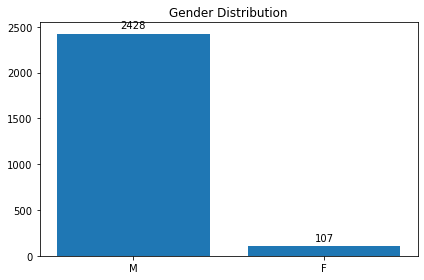

In [49]:
# with matplotlib
fig, ax = plt.subplots()
ax.set_title ("Gender Distribution")
container = ax.bar(kill.gender.unique(), kill.gender.value_counts())
ax.bar_label(container, padding=3)
plt.tight_layout()
plt.show()

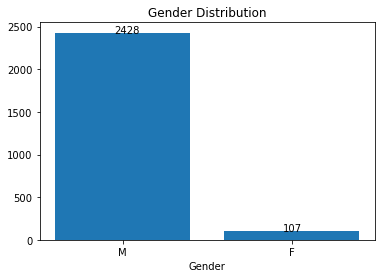

In [32]:
# with matplotlib second way
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values)
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+0.15));

## 2: Plot 7 most common kill weapons

In [50]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [56]:
common_weapons =kill.armed.value_counts()[:7]
common_weapons

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [57]:
kill.armed.value_counts()[:7].index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

In [58]:
kill.armed.value_counts()[:7].values

array([1398,  373,  177,  171,  117,  104,   18])

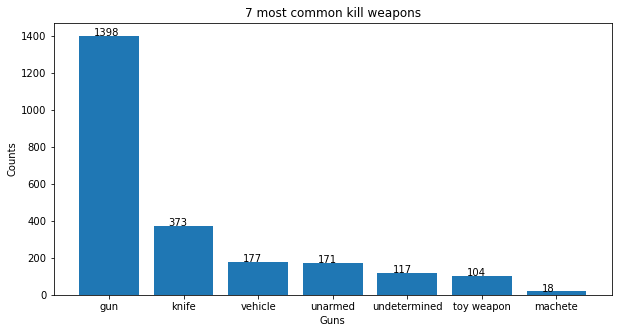

In [72]:
fix, ax =plt.subplots(figsize=(10,5))
ax.bar(kill.armed.value_counts()[:7].index, kill.armed.value_counts()[:7].values)
ax.set_xlabel("Guns")
ax.set_ylabel("Counts")
ax.set_title ("7 most common kill weapons")
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+0.30))
fig.show()

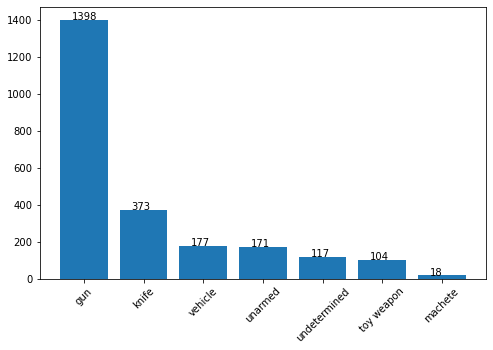

In [73]:
# with matplotlib

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(common_weapons.index, common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+0.30))

fig.show()


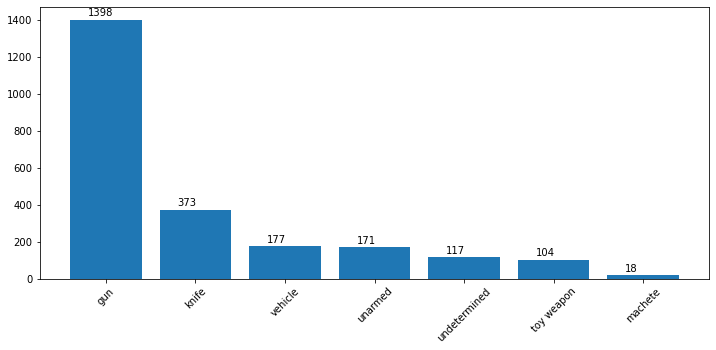

In [87]:
a = kill.armed.value_counts().head(7)
fig ,ax = plt.subplots(figsize=(12,5))
ax.bar(x=a.index,height = a.values)
ax.set_xticklabels(a.index, rotation = 45)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [74]:
kill.age.unique()

array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 61., 56., 40., 45., 26., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., nan, 77., 58., 64., 52., 63.,
       44., 60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6.,
       12., 70., 80., 14., 82., 13., 73., 91., 79.])

In [75]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

array(['above25', 'below25', 'others'], dtype=object)

In [85]:
kill["new_age_cat"] = kill.age.apply(lambda x : "above25" if x>=25 else ("below25" if x<25 else "others"))
kill["new_age_cat"] 

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531     others
2532    above25
2533    above25
2534    above25
Name: new_age_cat, Length: 2535, dtype: object

In [64]:
def agex (x):
    if x >= 25:
        return "above25"
    elif x < 25:
        return "below25"
    else:
        return "others"

In [87]:
kill.new_age_cat.unique()

array(['above25', 'below25', 'others'], dtype=object)

In [88]:
#kill["age_cat"] = kill.age.apply(lambda x : agex(x))
#kill["age_cat"]

# kill["age_cat"] = kill.age.apply(lambda x : "above25" if x >= 25 else ( "below25" if x<25 else "others" ))
# kill.age_cat

In [ ]:
#kill["age_cat"] = kill.age.apply(------------------------------)

In [89]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,new_age,new_age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25


In [91]:
kill.new_age_cat.value_counts()

above25    2008
below25     450
others       77
Name: new_age_cat, dtype: int64

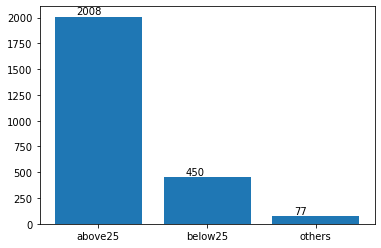

In [97]:
fig, ax = plt.subplots()
ax.bar(kill.new_age_cat.unique(),kill.new_age_cat.value_counts())
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

In [113]:
age_class=kill.new_age_cat.value_counts()
age_class


above25    2008
below25     450
others       77
Name: new_age_cat, dtype: int64

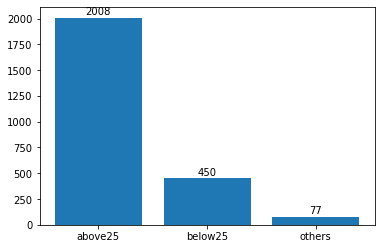

In [114]:
# with matplotlib
fig, ax = plt.subplots()
cont = ax.bar(age_class.index, age_class.values)
ax.set_xticklabels(age_class.index, rotation=0)
ax.bar_label(cont, padding=1)
fig.show()


## 4: Plot number of killed poeple by race

In [90]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [95]:
kill.race.isnull().sum()

195

In [92]:
race_freq.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [94]:
race_freq.values

array([1201,  618,  423,   39,   31,   28], dtype=int64)

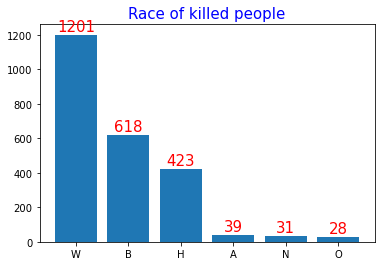

In [105]:
# with matplotlib
fig, ax = plt.subplots()
container = ax.bar(x= race_freq.index, height=race_freq.values)
ax.set_title("Race of killed people", fontsize=15, color="blue")
ax.bar_label(container, padding=1, fontsize=15, color="red")
fig.show()

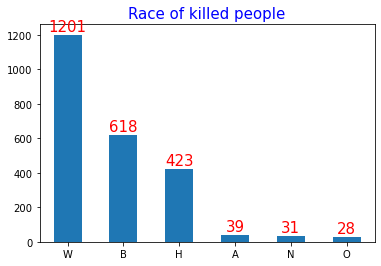

In [117]:
# with pandas
fig, ax = plt.subplots()
ax = kill.race.value_counts().plot(kind="bar")
ax.set_title("Race of killed people", fontsize=15, color="blue")
ax.bar_label(container, padding=1, fontsize=15, color="red", rotation=0)
ax.set_xticklabels(race_freq.index, rotation=0)
fig.show()

#container = ax.bar(x= race_freq.index, height=race_freq.values)
#ax.set_title("Race of killed people", fontsize=15, color="blue")
#ax.bar_label(container, padding=1, fontsize=15, color="red")
#fig.show()

## 5: Killed People According to Races (Pie Chart)

In [116]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,new_age,new_age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25


In [117]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [118]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [120]:
kill_last = kill.copy()
kill_last

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,new_age,new_age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,above25,above25
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,others,others
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,above25,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25,above25


In [121]:
kill_last.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,new_age,new_age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25


In [123]:
kill_last.dropna(inplace=True)

In [125]:
kill_last.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
new_age                    0
new_age_cat                0
dtype: int64

In [126]:
kill_last.shape

(2254, 16)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [128]:
y=kill_last.race.value_counts().values

In [129]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [132]:
explode_list=(0,0,0.2,0,0,0)

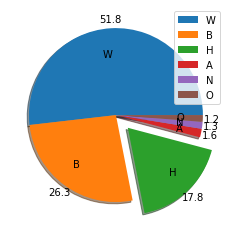

In [134]:
plt.pie(y, 
        labels = labels,
        labeldistance=0.7, 
        autopct="%.1f", 
        startangle=0, 
        shadow=True, 
        pctdistance=1.1, 
        explode=explode_list)

plt.legend()
plt.show()

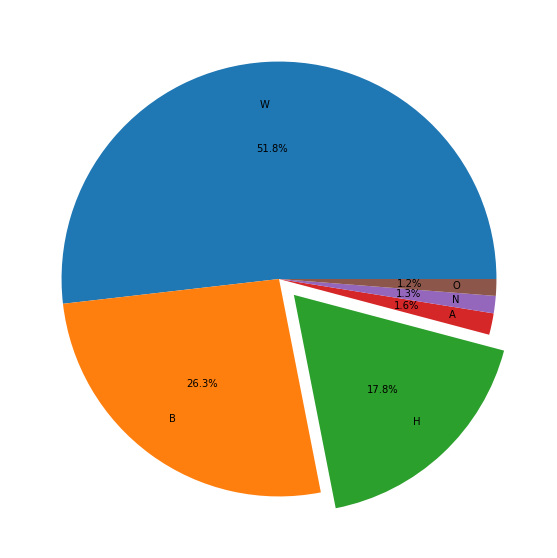